In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))
     ]
)

mnist_data = datasets.MNIST(root='./data', train=True, download = True, transform = transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size = 64, shuffle= True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 61.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.72MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 15.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.80MB/s]


In [ ]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(-1.) tensor(1.)


In [ ]:
class Autoencoder_Linear(nn.Module):
  def __init__(self):
    super().__init__()
    # repeatedly reducing the size
    self.encoder = nn.Sequential(
        nn.linear(28*28, 128),
        nn.Relu(),
        nn.Linear(128, 64),
        nn.Relu(),
        nn.Linear(64,12),
        nn.Relu(),
        nn.Linear(12,3)
    )

    self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.Relu(),
        nn.Linear(12, 64),
        nn.Relu(),
        nn.Linear(64, 128),
        nn.Relu(),
        nn.Linear(128, 28*28),
        nn.Sigmoid()


    )


  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded




In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    # repeatedly reducing the size
    self.encoder = nn.Sequential(
        nn.Conv2d(1, 16, 3, stride = 2, padding = 1),
        nn.ReLU(),
        nn.Conv2d(16, 32, 3, stride = 2, padding = 1),
        nn.ReLU(),
        nn.Conv2d(32, 64, 7)
    )

    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(64, 32, 7),
        nn.ReLU(),
        nn.ConvTranspose2d(32, 16, 3, stride = 2, padding = 1, output_padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(16, 1, 3, stride = 2, padding = 1, output_padding=1),
        nn.Sigmoid()
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
model = Autoencoder() # Create an instance of the Autoencoder class

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), # Pass the parameters of the model instance
                             lr = 1e-3,
                             weight_decay = 1e-5)


In [ ]:
# trining loop

num_epochs = 10
outputs = []
for epoch in range(num_epochs):
  for (img, _) in data_loader:
    recon = model(img)
    loss = criterion(recon, img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch{epoch+1}, Loss:{loss.item():.4f}')
  outputs.append((epoch, img, recon))

Epoch1, Loss:0.9245
Epoch2, Loss:0.9258
Epoch3, Loss:0.8522
Epoch4, Loss:0.8416
Epoch5, Loss:0.8499
Epoch6, Loss:0.8536
Epoch7, Loss:0.8472
Epoch8, Loss:0.8410
Epoch9, Loss:0.8351
Epoch10, Loss:0.8487


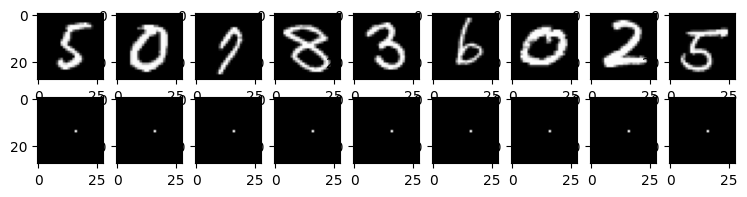

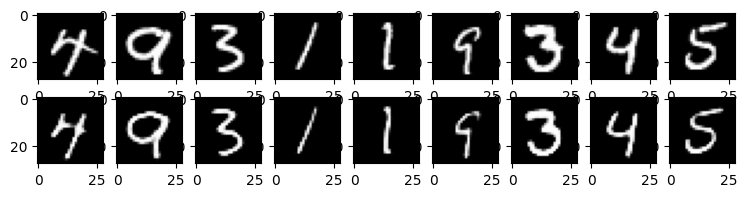

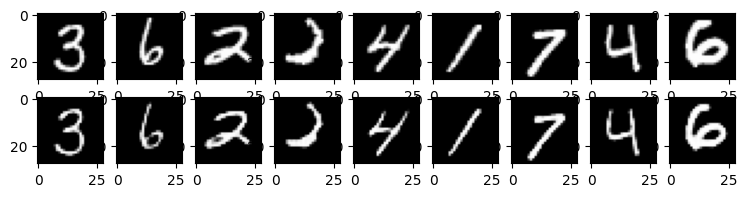

In [ ]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])